In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import qutip as q
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
import pickle 
from functions import diagonalize_2,isingmodel_rev_frac2
from functions import construct_ham,construct_distant_ham_2sites
from math import floor, ceil
import matplotlib.pyplot as plt
from gapcalc import infinite_system_algorithm,Block,model_d
from scipy.sparse import kron

In [13]:
lambdarange=np.linspace(0.5,1.5)

In [17]:
sX = np.array([[0,0.5], [0.5, 0]], dtype='d') 
Id = np.array([[1, 0], [0, 1]], dtype='d')

def H2(Sx1, Sx2):  # two-site part of H
    
    return     -(kron(Sx1, Sx2)) 


h=0.000001

In [18]:
energapdic={}
for L in [10,20,40]:
    energapvec=np.zeros_like(lambdarange)
    for i,lam in enumerate(lambdarange):
        H1 = -0.5*lam*np.array([[0.5, 0], [0, -0.5]], dtype='d') -h*np.array([[0, 1], [1, 0]], dtype='d') # single-site portion of H 

        site = Block(length=1, basis_size=model_d, operator_dict={
            "H": H1,
            "conn_Sx": sX
            })

        start=time.time()

        energapvec[i]=infinite_system_algorithm(site,site, L, L,H2)

        end=time.time()
    print(L)
    energapdic[L]=energapvec
 

10
20
40


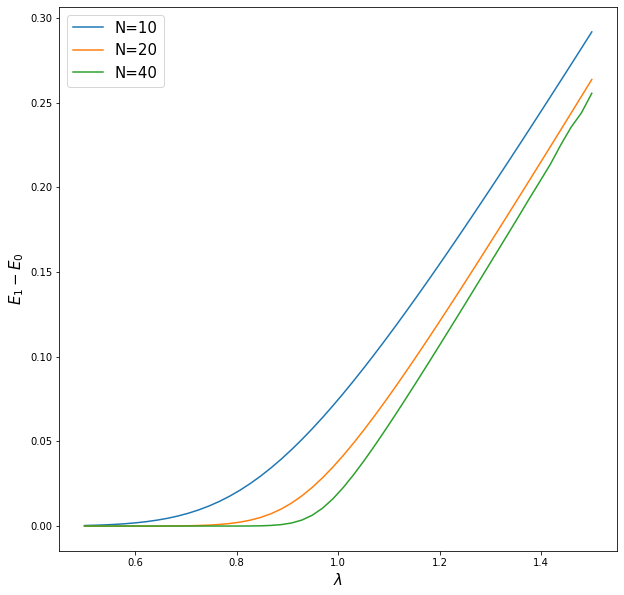

In [30]:
plt.figure(figsize=[10,10])
for L in [10,20,40]:   
    plt.plot(lambdarange,energapdic[L],label="N={}".format(L))
plt.xlabel(r"$\lambda$",fontsize=15)
plt.ylabel(r"$E_1-E_0$",fontsize=15)
plt.legend(fontsize=15)
plt.savefig("energapplot")
plt.show()